In [1]:
import  sys
sys.path.append('../')
import  latexStrings  as ls
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pdesolver

# Ejercicio 2

Dado el PVIF (\ref{eq:1}) planteado anteriormente, veamos el comportamiento del metodo implicito para su aproximacion:

In [2]:
u = lambda x, t: np.exp(-np.pi*t)*np.sin(np.pi*x)
eq= {}
eq['D'] = 1/np.pi
eq['ic'] = lambda x : np.sin(np.pi*x)
eq['bcL'] = lambda t : 0
eq['bcR'] = lambda t : -np.pi*np.exp(-np.pi*t)
Ix = [0, 1]
It = [0, 1]

Primero observemos una grafica de la aproximacion usando 20 pasos en el espacio ($h = 1/20$) y 10 pasos en el tiempo ($k = 1/10$):

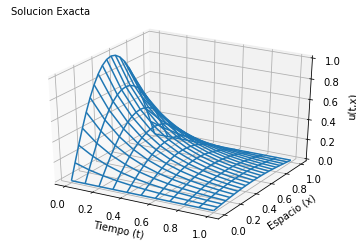

In [3]:
M = 20
N = 10

W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
U = np.array([[u(x,t) for t in T] for x in X])

MeshT, MeshX = np.meshgrid(T, X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(MeshT, MeshX, U)

ax.text2D(0, 1, "Solucion Exacta", transform=ax.transAxes)
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('u(t,x)')

plt.show()

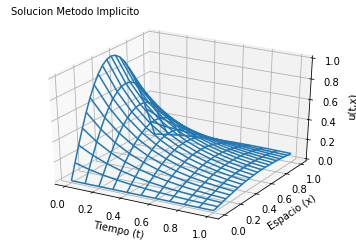

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(MeshT, MeshX, W)

ax.text2D(0, 1, "Solucion Metodo Implicito", transform=ax.transAxes)
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('u(t,x)')

plt.show()

Vemos que con los mismos pasos en el tiempo, pero mas de 20 veces menos los pasos en el tiempo, el metodo implicito obtiene una aproximacion comparable a la del metodo explicito. Ahora veamos como varia el error al considerar los pasos $k = \{1/16, 1/64, 1/256\}$ y $h = \{ 1/10, 1/20, 1/40 \}$:

In [5]:
h = [10, 20, 40]
k = [16, 64, 256]
Errores = []
for M in h:
    for N in k:
        W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
        U = u(X, 1)
        Errores.append(max(abs(U-W[:,-1])))

data = [['1/10'], ['1/20'], ['1/40']]
data[0].extend(Errores[:3])
data[1].extend(Errores[3:6])
data[2].extend(Errores[6:])
header = ['\diagbox{h}{k}', '1/16', '1/64', '1/256']
Latex(ls.latexTable(header, data, 'r|rrr'))

<IPython.core.display.Latex object>

Notemos que en este caso $h_{i+1}=\frac{1}{2}h_i$ $\quad k_{i+1}=\frac{1}{4}k_i\quad $ (con i=1,2,3) 

En los resultados se puede observar que $ 0.014939536443073914\approx\left(\frac{1}{4}\right)0.05783108269993153$ y que $0.0037665127468114214\approx\left(\frac{1}{4}\right) 0.014939536443073914$

$O(h_{i+1}^2+k_{i+1})=O(\frac{h_{i}^2}{2^2}+\frac{k_{i}}{4})=\frac{1}{4}O(h_{i}^2+k_{i})$  

Podemos ver a k como función de h de la siguiente forma:
$$k(h)=\frac{25}{4}h^2$$

sustituyendo en la expresión anterior: $$O(h^2+k)=O(h^2+\frac{25}{4}h^2)\approx O(h^2)$$

Por otro lado, si calculamos el "$erc$ (\textit{estimated rate of convergence}) dado por : $$erc_i:=\frac{\ln(Error(h_i)/Error(h_j))}{\ln(h_i/h_j)}$$

con $i < j,$ tal que $ j,i\in \{ 1,2,3 \}$ debe ser $erc\approx 2 $ dado $O(h^2)$

In [10]:
erc1=np.log(0.05783108269993153/0.014939536443073914)/np.log((.1)/(.05))
erc2=np.log(0.014939536443073914/0.0037665127468114214)/np.log((.05)/(.025))
print('erc1= ',erc1)
print('erc2= ',erc2)

erc1=  1.95270972855
erc2=  1.98783406674


Ahora consideremos los pasos $k = h = \{ 1/10, 1/20, 1/40 \}$:

In [6]:
h = [10, 20, 40]
k = [10, 20, 40]
Errores = []
for M in h:
    for N in k:
        W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
        U = u(X, 1)
        Errores.append(max(abs(U-W[:,-1])))

data = [['1/10'], ['1/20'], ['1/40']]
data[0].extend(Errores[:3])
data[1].extend(Errores[3:6])
data[2].extend(Errores[6:])
header = ['\diagbox{h}{k}', '1/10', '1/20', '1/40']
Latex(ls.latexTable(header, data, 'r|rrr'))

<IPython.core.display.Latex object>

En este inciso $h_{i+1}=\frac{1}{2}h_i$ (con i=1,2,3)

En los resultados se puede observar que para $h=\frac{1}{10}$ el error es de la forma $O(h)=O(\frac{1}{10})=C\left(\frac{1}{10}\right)\approx0.08096946676799946$

También se puede observar que $0.03789343824335091\approx\left(\frac{1}{2}\right)0.08096946676799946$, que $0.018281192075090623\approx\left(\frac{1}{2}\right)0.03789343824335091$ y por lo tanto que $0.018281192075090623\approx\left(\frac{1}{4}\right)0.08096946676799946$ lo que implica que $O(\frac{h}{2})\approx \frac{1}{2}O(h)$ y que $O(\frac{1}{4}h)\approx \frac{1}{4}O(h)$, en general $O(c*h)\approx cO(h)$ con c constante.\\
Esto quiere decir que el error en función de h, en nuestro ejemplo del método implícito, no se reduce cuadráticamente sino que se reduce linealmente, i.e. el error en función de h es de orden 1 ($O(h)$). \\
Teóricamente cuando $h\approx k$ el error del esquema implícito debe ser $O(k+h^2)$ en este caso $h=k\Rightarrow O(k+h^2)=O(k+k^2)\approx O(k)=O(h)$. \\
Por lo tanto, se puede ver que nuestros resultados son consistentes con la teoría.

In [9]:
eoc1=np.log(0.08096946676799946/0.03789343824335091)/np.log((.1)/(.05))
eoc2=np.log(0.03789343824335091/0.018281192075090623)/np.log((.05)/(.025))
print('eoc1= ',eoc1)
print('eoc2= ',eoc2)

eoc1=  1.09542992851
eoc2=  1.05158789971


Finalmente tomemos los pasos $h = 1/10$, $k = \{1/25, 1/50, 1/100, 1/200\}$:

In [ ]:
M = 10
k = [25, 50, 100, 200]
Errores = []
for N in k:
    W, X, T = pdesolver.implicitHeat(eq, Ix, It, M, N)
    U = u(X, 1)
    Errores.append(max(abs(U-W[:,-1])))

data = [['1/10']]
data[0].extend(Errores)
header = ['\diagbox{h}{k}', '1/25', '1/50', '1/100', '1/200']
Latex(ls.latexTable(header, data, 'r|rrrr'))

--- Interpretar ---